### Comparision of the 4 simulators for TurtleBot

In [1]:
import pandas as pd


In [2]:
# Load and display the contents of the CSV file
file_path = 'mavis_pro_combined.csv'
data = pd.read_csv(file_path)

data = data.dropna(axis="columns", how="any")
data.columns = ['Iteration','CPU_Usage', 'Memory_Usage', 'FPS','GPU_Usage','Simulator']

# Display all rows of the dataframe
data

,Iteration,CPU_Usage,Memory_Usage,FPS,GPU_Usage,Simulator
0,1,40.9,4.100000,0,23.080000,Gazebo
1,2,42.2,4.100000,0,25.210000,Gazebo
2,3,44.4,4.100000,0,26.460000,Gazebo
3,4,44.5,4.100000,0,27.300000,Gazebo
4,5,44.9,4.100000,0,27.920000,Gazebo
5,6,44.9,4.100000,0,28.350000,Gazebo
6,7,44.2,4.100000,0,28.650000,Gazebo
7,8,45.5,4.100000,0,28.950000,Gazebo
8,9,44.9,4.100000,0,29.140000,Gazebo
9,10,45.9,4.100000,0,29.330000,Gazebo


In [3]:
# Calculating descriptive statistics for each metric grouped by simulator
stats = data.groupby('Simulator').agg({
    'CPU_Usage': ['mean', 'std', 'median'],
    'Memory_Usage': ['mean', 'std', 'median'],
    'FPS': ['mean', 'std', 'median'],
    'GPU_Usage': ['mean','std','median']
}).round(2)

stats


CPU_Usage               Memory_Usage                 FPS        \
                 mean    std median         mean   std median   mean   std   
Simulator                                                                    
CoppeliaSim    224.41  66.84  247.7         0.28  0.00   0.28   0.00  0.00   
Gazebo          44.35   1.25   44.6         4.10  0.00   4.10   0.00  0.00   
Isaac Sim        4.69   1.55    4.6        45.79  0.03  45.80  38.67  2.74   
Webots           9.75   6.26    8.3        85.10  0.00  85.10   0.00  0.00   

                   GPU_Usage               
            median      mean   std median  
Simulator                                  
CoppeliaSim    0.0     31.49  1.25  32.10  
Gazebo         0.0     28.19  1.95  28.95  
Isaac Sim     39.0     32.62  0.09  32.68  
Webots         0.0     29.33  1.28  29.61

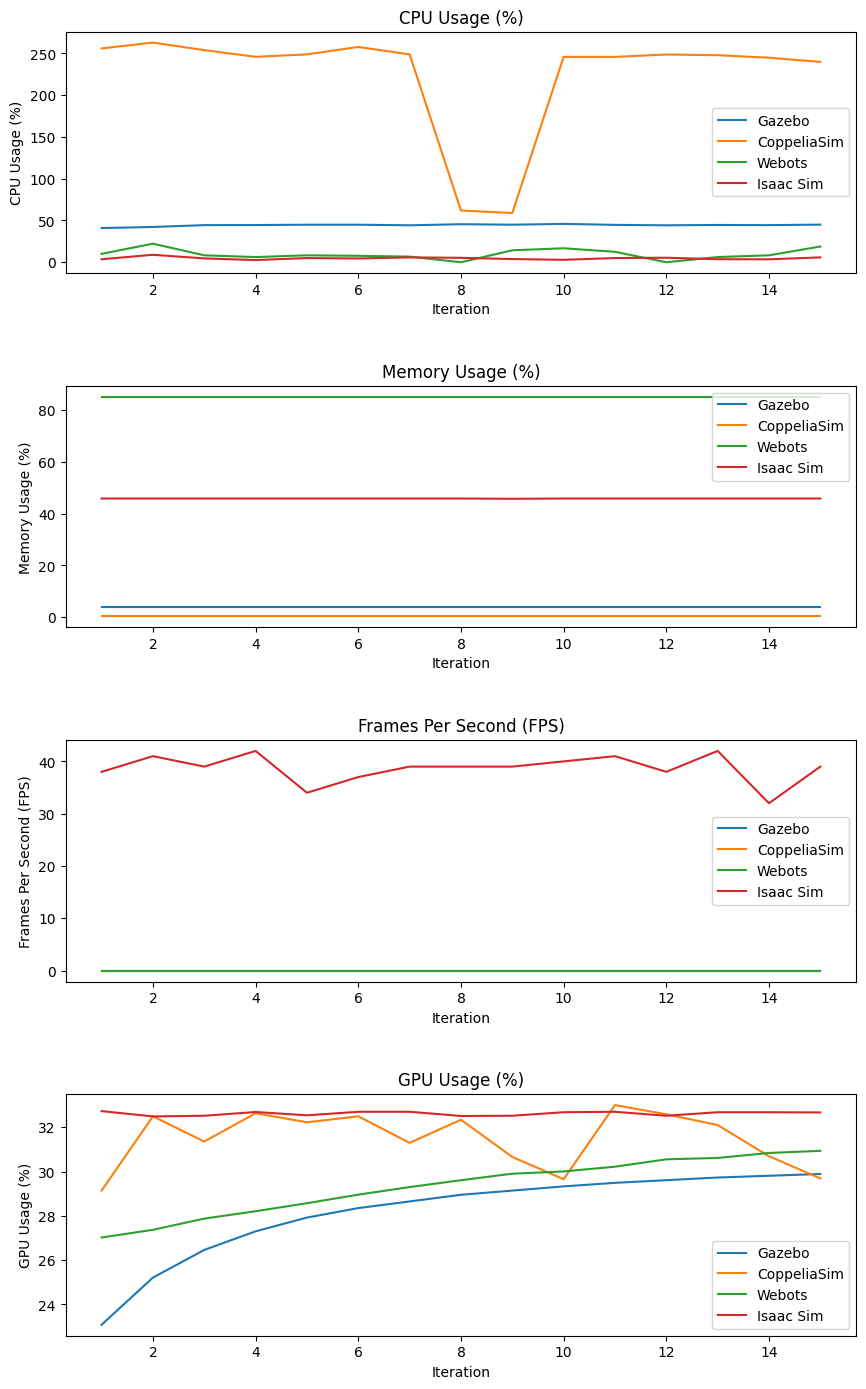

In [4]:
# Setting up the plots
# Reassigning correct column names and cleaning up the data again
import matplotlib.pyplot as plt
data.columns = ['Iteration','CPU_Usage', 'Memory_Usage', 'FPS','GPU_Usage','Simulator']
data['Simulator'] = data['Simulator'].fillna(method='ffill')


fig, axes = plt.subplots(4, 1, figsize=(10, 15))
fig.tight_layout(pad=6.0)

# Titles for plots
titles = ['CPU Usage (%)', 'Memory Usage (%)', 'Frames Per Second (FPS)','GPU Usage (%)']

# Data for plotting
metrics = ['CPU_Usage', 'Memory_Usage', 'FPS','GPU_Usage']

# Plotting each metric
for ax, metric, title in zip(axes, metrics, titles):
    for simulator in data['Simulator'].unique():
        subset = data[data['Simulator'] == simulator]
        ax.plot(subset['Iteration'], subset[metric], label=simulator)
    ax.set_title(title)
    ax.set_xlabel('Iteration')
    ax.set_ylabel(title)
    ax.legend()

plt.show()

